# Introduction:
The aim of this project is to predict the probabily whether a customer will default in the future given his record present in the dataset. The classification methods will be used to determine the delinquency probabilities of the customer.
The dataset used for model developement consist of 155000 observations and 11 variables. The target variable is SeriousDlqin2yrs. Remaining 10 variables represent clients characterisctics such as for example age, number of open credit lines and loans, number of dependents, monthly income, debt ratio.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pickle
import missingno as msno
from sklearn.model_selection import KFold , cross_val_score
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [28]:
df = pd.read_csv('credit_score.csv')
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [29]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

# I Exploratory Data Analysis:

-Missing vales Analysis

-Outlier Analysis

-Distribution Analysis

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30_59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60_89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [31]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


# Missing analysis

In [32]:
na_check = df.isna().sum()[df.isna().sum()>0]
na_check / len(df)

MonthlyIncome         0.198207
NumberOfDependents    0.026160
dtype: float64

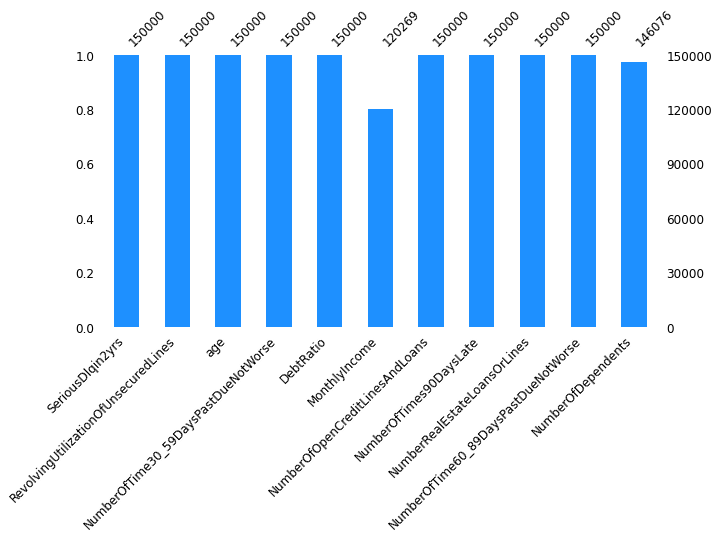

In [33]:
msno.bar(df, color="dodgerblue", figsize=(10,5), fontsize=12);

# Ditribution analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


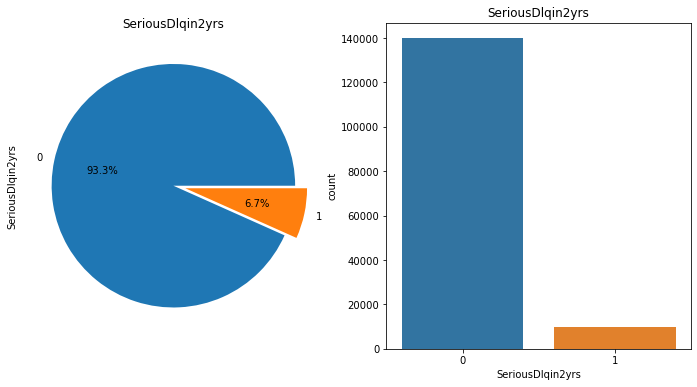

In [34]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
df['SeriousDlqin2yrs'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=axes[0])
axes[0].set_title('SeriousDlqin2yrs')

sns.countplot('SeriousDlqin2yrs',data=df,ax=axes[1])
axes[1].set_title('SeriousDlqin2yrs')
plt.show()

In [35]:
df.SeriousDlqin2yrs.value_counts(normalize=True)

0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64

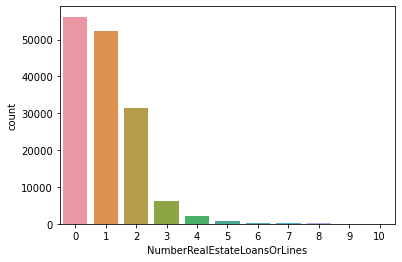

In [36]:
sns.countplot(x="NumberRealEstateLoansOrLines", data=df.loc[df["NumberRealEstateLoansOrLines"] <= 10])
plt.show()

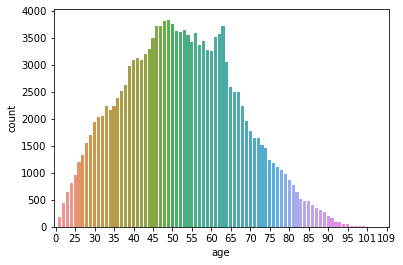

In [37]:
ax= sns.countplot(x="age", data=df)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.show()

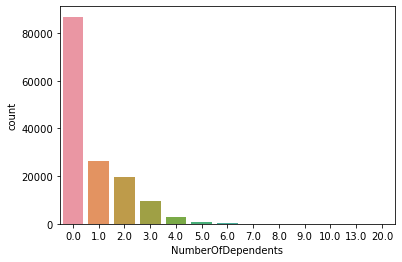

In [38]:
sns.countplot(x="NumberOfDependents", data=df)
plt.show()

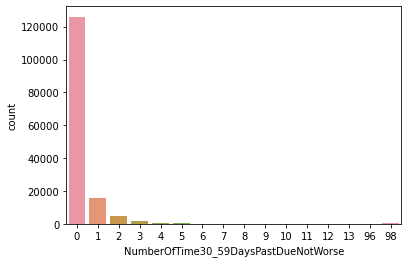

In [39]:
ax= sns.countplot(x="NumberOfTime30_59DaysPastDueNotWorse", data=df)


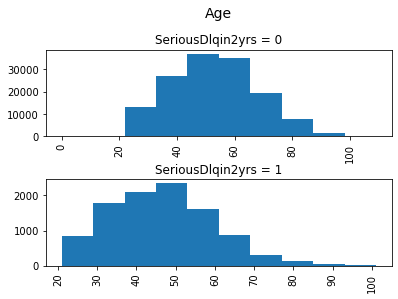

In [40]:
age_hist = df['age'].hist(by=df['SeriousDlqin2yrs'], bins=10, layout=(2,1))
age_hist[0].set_title('SeriousDlqin2yrs = 0')
age_hist[1].set_title('SeriousDlqin2yrs = 1')
plt.suptitle('Age', x=0.5, y=1.05, ha='center', fontsize=14)
plt.show()

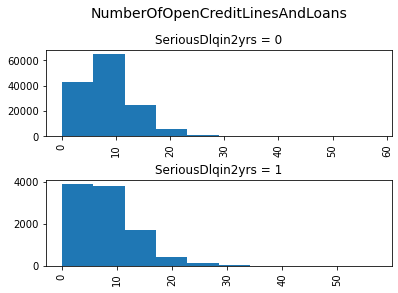

In [41]:
nb_hist = df['NumberOfOpenCreditLinesAndLoans'].hist(by=df['SeriousDlqin2yrs'], bins=10, layout=(2,1))
nb_hist[0].set_title('SeriousDlqin2yrs = 0')
nb_hist[1].set_title('SeriousDlqin2yrs = 1')
plt.suptitle('NumberOfOpenCreditLinesAndLoans', x=0.5, y=1.05, ha='center', fontsize=14)
plt.show()

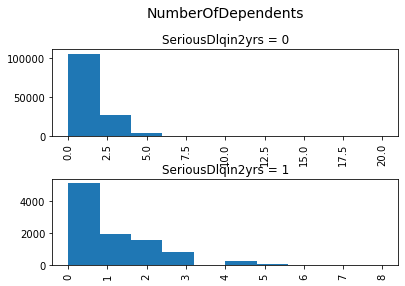

In [42]:
dep_hist = df['NumberOfDependents'].hist(by=df['SeriousDlqin2yrs'], bins=10, layout=(2,1))
dep_hist[0].set_title('SeriousDlqin2yrs = 0')
dep_hist[1].set_title('SeriousDlqin2yrs = 1')
plt.suptitle('NumberOfDependents', x=0.5, y=1.05, ha='center', fontsize=14)
plt.show()

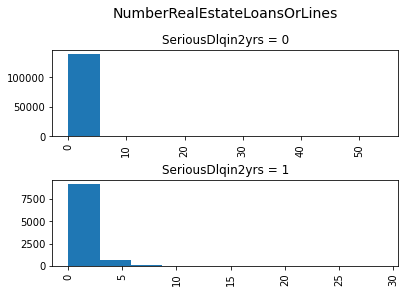

In [43]:
nb_hist = df['NumberRealEstateLoansOrLines'].hist(by=df['SeriousDlqin2yrs'], bins=10, layout=(2,1))
nb_hist[0].set_title('SeriousDlqin2yrs = 0')
nb_hist[1].set_title('SeriousDlqin2yrs = 1')
plt.suptitle('NumberRealEstateLoansOrLines', x=0.5, y=1.05, ha='center', fontsize=14)
plt.show()

# Outliers analysis

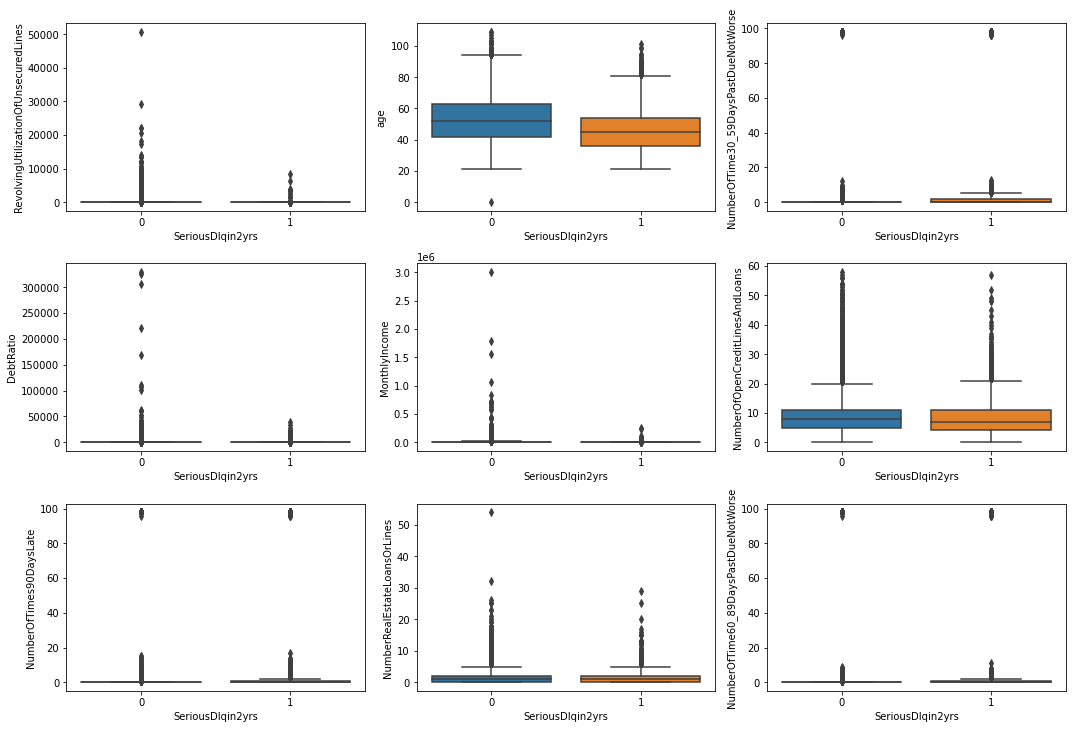

In [44]:
x = df.drop(labels=['SeriousDlqin2yrs'], axis=1)

fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(x, ax.flatten()):
    sns.boxplot(x='SeriousDlqin2yrs', y=var ,data=df, ax=subplot)
    fig.tight_layout()

The point biserial correlation is used to measure the relationship between a binary variable, x, and a continuous variable.

In [45]:
corr_list = []
y = df['SeriousDlqin2yrs']
x = df.drop(labels=['SeriousDlqin2yrs'], axis=1)

for column in x:
    print(column)
    corr = stats.pointbiserialr(list(df.loc[~df[column].isnull(),column]), list(df.loc[~df[column].isnull(),'SeriousDlqin2yrs']))
    print(corr[0])

RevolvingUtilizationOfUnsecuredLines
-0.001801502503943923
age
-0.1153855184688859
NumberOfTime30_59DaysPastDueNotWorse
0.12558696457286053
DebtRatio
-0.007602119826455997
MonthlyIncome
-0.019745546771055403
NumberOfOpenCreditLinesAndLoans
-0.02966856846931626
NumberOfTimes90DaysLate
0.11717461344360125
NumberRealEstateLoansOrLines
-0.007038116335982005
NumberOfTime60_89DaysPastDueNotWorse
0.10226086105036605
NumberOfDependents
0.046047943522182166


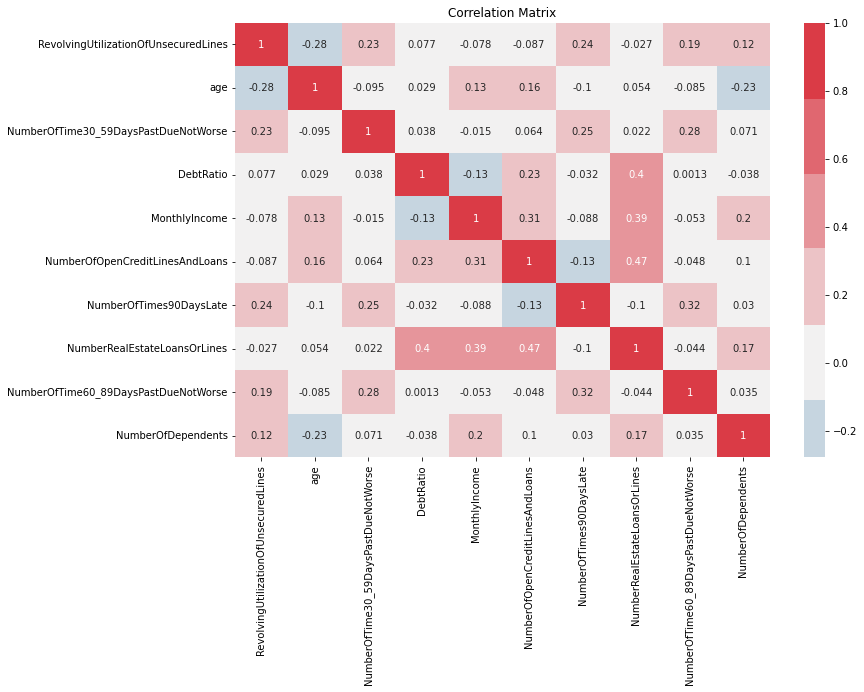

In [46]:
fig = plt.figure(figsize = [12,8])
sns.heatmap(x.corr(method='spearman'), cmap=sns.diverging_palette(240, 10, n=9),annot=True, center=0)
plt.title("Correlation Matrix", fontsize=12);

II Data preprocessing

In [47]:
df2=df.copy()

In [48]:
y = df2.pop('SeriousDlqin2yrs')
X = df2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)

In [49]:
print(X_train.isna().sum()[X_train.isna().sum()>0])
print(X_test.isna().sum()[X_test.isna().sum()>0])

MonthlyIncome         23675
NumberOfDependents     3128
dtype: int64
MonthlyIncome         6056
NumberOfDependents     796
dtype: int64


In [50]:
for col in X_train.columns:
    X_train[col] = X_train[col].fillna((X_train[col].median()))
for col in X_test.columns:
    X_test[col] = X_test[col].fillna((X_train[col].median()))

In [51]:
print(X_train.isna().sum()[X_train.isna().sum()>0])
print(X_test.isna().sum()[X_test.isna().sum()>0])

Series([], dtype: int64)
Series([], dtype: int64)


In [52]:
q1 = X_train.quantile(0.25)
q3 = X_train.quantile(0.75)
IQR = q3 - q1
upr_bound = q3+(1.5*IQR)
lwr_bound = q1-(1.5*IQR)
print('Upper:',upr_bound)
print('Lower:',lwr_bound)

Upper: RevolvingUtilizationOfUnsecuredLines        1.350190
age                                        96.000000
NumberOfTime30_59DaysPastDueNotWorse        0.000000
DebtRatio                                   1.889087
MonthlyIncome                           12650.000000
NumberOfOpenCreditLinesAndLoans            20.000000
NumberOfTimes90DaysLate                     0.000000
NumberRealEstateLoansOrLines                5.000000
NumberOfTime60_89DaysPastDueNotWorse        0.000000
NumberOfDependents                          2.500000
dtype: float64
Lower: RevolvingUtilizationOfUnsecuredLines      -0.762766
age                                        8.000000
NumberOfTime30_59DaysPastDueNotWorse       0.000000
DebtRatio                                 -0.852924
MonthlyIncome                          -1350.000000
NumberOfOpenCreditLinesAndLoans           -4.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines              -3.000000
NumberOfTime60_89DaysPast

In [53]:
X_train['NumberOfTime30_59DaysPastDueNotWorse'].value_counts(normalize=True).sort_index()

0     0.839950
1     0.107033
2     0.030742
3     0.011842
4     0.004842
5     0.002217
6     0.000900
7     0.000367
8     0.000175
9     0.000083
10    0.000033
11    0.000008
12    0.000017
13    0.000008
96    0.000017
98    0.001767
Name: NumberOfTime30_59DaysPastDueNotWorse, dtype: float64

In [54]:
X_train['NumberOfTime60_89DaysPastDueNotWorse'].value_counts(normalize=True).sort_index()

0     0.949008
1     0.038550
2     0.007358
3     0.002117
4     0.000758
5     0.000225
6     0.000108
7     0.000067
8     0.000008
9     0.000008
11    0.000008
96    0.000017
98    0.001767
Name: NumberOfTime60_89DaysPastDueNotWorse, dtype: float64

In [55]:
X_train['NumberOfTimes90DaysLate'].value_counts(normalize=True).sort_index()

0     0.944117
1     0.035250
2     0.010467
3     0.004417
4     0.001983
5     0.000833
6     0.000517
7     0.000242
8     0.000125
9     0.000108
10    0.000058
11    0.000025
12    0.000008
13    0.000025
14    0.000017
15    0.000017
17    0.000008
96    0.000017
98    0.001767
Name: NumberOfTimes90DaysLate, dtype: float64

In [56]:
var=X_train.drop(labels=["NumberOfTime30_59DaysPastDueNotWorse",'NumberOfTime60_89DaysPastDueNotWorse','NumberOfTimes90DaysLate'],axis=1)
for col in var:
    q1 = X_train[col].quantile(0.25)
    q3 = X_train[col].quantile(0.75)
    IQR = q3 - q1
    upr_bound = q3+(1.5*IQR)
    lwr_bound = q1-(1.5*IQR)
    X_train[col] = np.where(X_train[col]> upr_bound, upr_bound,
                          X_train[col])
    X_train[col] = np.where(X_train[col]< lwr_bound, lwr_bound,
                          X_train[col])

In [57]:
X_train['NumberOfTime30_59DaysPastDueNotWorse'] = np.where(X_train['NumberOfTime30_59DaysPastDueNotWorse']> 13, 13,
                          X_train['NumberOfTime30_59DaysPastDueNotWorse'])
X_train['NumberOfTime60_89DaysPastDueNotWorse'] = np.where(X_train['NumberOfTime60_89DaysPastDueNotWorse']> 11, 11,
                          X_train['NumberOfTime60_89DaysPastDueNotWorse'])
X_train['NumberOfTimes90DaysLate'] = np.where(X_train['NumberOfTimes90DaysLate']> 17, 17,
                          X_train['NumberOfTimes90DaysLate'])

In [58]:
X_train.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,NumberOfDependents
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,0.321553,52.287092,0.268525,0.657748,5868.946633,8.337600,0.120525,1.002358,0.084742,0.658067
std,0.356278,14.768500,0.880460,0.679878,3047.415496,4.741432,0.860942,1.019246,0.568137,0.904515
min,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029593,41.000000,0.000000,0.175330,3900.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.153318,52.000000,0.000000,0.366194,5390.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.557832,63.000000,0.000000,0.860833,7400.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.350190,96.000000,13.000000,1.889087,12650.000000,20.000000,17.000000,5.000000,11.000000,2.500000


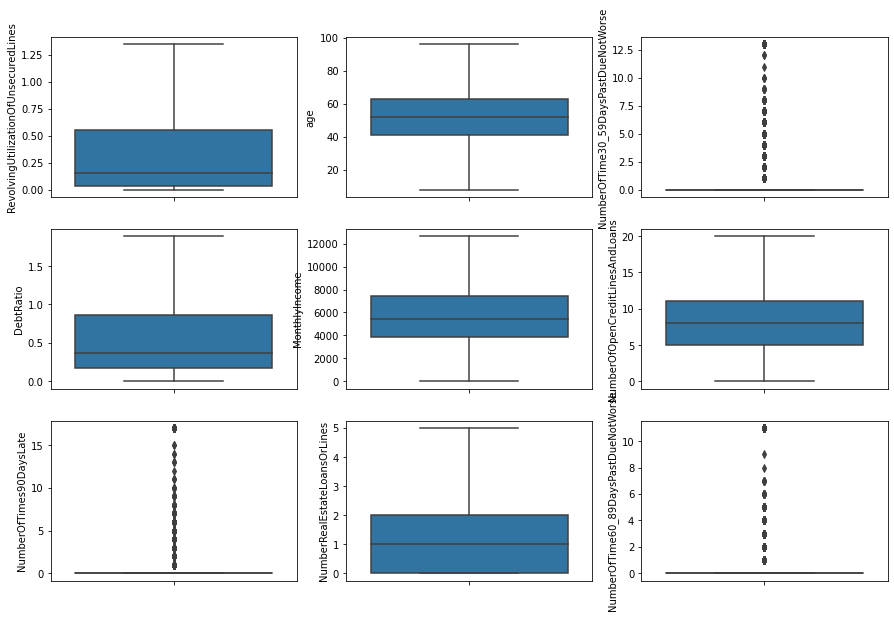

In [59]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(X_train.columns, ax.flatten()):
    sns.boxplot(y=var ,data=X_train, ax=subplot)

Baseline model - logistic regresion

In [68]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [69]:
y_pred_tr = logreg.predict(X_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on train set: 0.94
Accuracy of logistic regression classifier on test set: 0.77


In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87     27995
           1       0.09      0.25      0.13      2005

    accuracy                           0.77     30000
   macro avg       0.51      0.53      0.50     30000
weighted avg       0.88      0.77      0.82     30000



In [71]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print('AUC:',logit_roc_auc)
print('GINI:',2*logit_roc_auc-1)


AUC: 0.5305801846517837
GINI: 0.061160369303567386


2nd model: logistic regression with standarization

In [64]:
#Feature scaling
scale=StandardScaler()
X_train_s = scale.fit_transform(X_train)
X_test_s = scale.transform(X_test)

In [65]:
logreg2 = LogisticRegression(max_iter=1000,class_weight='balanced')
logreg2.fit(X_train_s, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [66]:
y_pred_tr = logreg2.predict(X_train_s)
y_pred = logreg2.predict(X_test_s)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg2.score(X_train_s, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg2.score(X_test_s, y_test)))

Accuracy of logistic regression classifier on train set: 0.80
Accuracy of logistic regression classifier on test set: 0.82


In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90     27995
           1       0.21      0.63      0.32      2005

    accuracy                           0.82     30000
   macro avg       0.59      0.73      0.61     30000
weighted avg       0.92      0.82      0.86     30000



In [72]:
logit_roc_auc = roc_auc_score(y_test, logreg2.predict(X_test_s))
print('AUC:',logit_roc_auc)
print('GINI:',2*logit_roc_auc-1)

AUC: 0.733085485963605
GINI: 0.46617097192721


3rd model: Decision tree with Gridsearch

In [73]:
pipe = Pipeline([

                   ('classifier', DecisionTreeClassifier())])


param = {'classifier__max_depth': [1,2,3,4,5,6], 'classifier__min_samples_split': [100,120,150,200,50,240], 'classifier__criterion': ['gini', 'entropy']
            }

model_selection = GridSearchCV(pipe, param, return_train_score=True,verbose=True, n_jobs=-1,cv=5)
model_selection.fit(X_train, y_train)
model_selection.best_params_
print("Best score (CV score=%0.3f):" % model_selection.best_score_)
print("Best parameter :", model_selection.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best score (CV score=0.936):
Best parameter : {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_split': 200}


In [97]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split= 200)
clf.fit(X_train, y_train)
print('Accuracy of DecisionTreeClassifier on train set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of DecisionTreeClassifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of DecisionTreeClassifier on train set: 0.94
Accuracy of DecisionTreeClassifier on test set: 0.94


In [98]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     27995
           1       0.58      0.19      0.28      2005

    accuracy                           0.94     30000
   macro avg       0.76      0.59      0.63     30000
weighted avg       0.92      0.94      0.92     30000



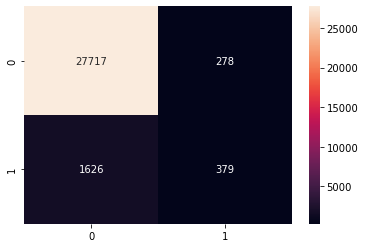

In [99]:
cm=confusion_matrix(y_test, clf.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

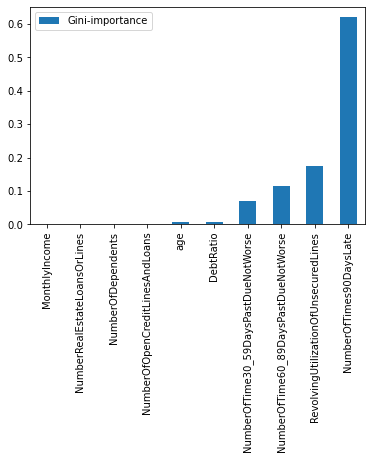

In [78]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90)
plt.show()

In [79]:
log2_fpr, log2_tpr, log2_threshold   = roc_curve(y_test, logreg2.predict(X_test_s))
log_fpr, log_tpr, log_threshold   = roc_curve(y_test, logreg.predict(X_test))
tree_fpr, tree_tpr, tree_threshold   = roc_curve(y_test,  clf.predict(X_test))

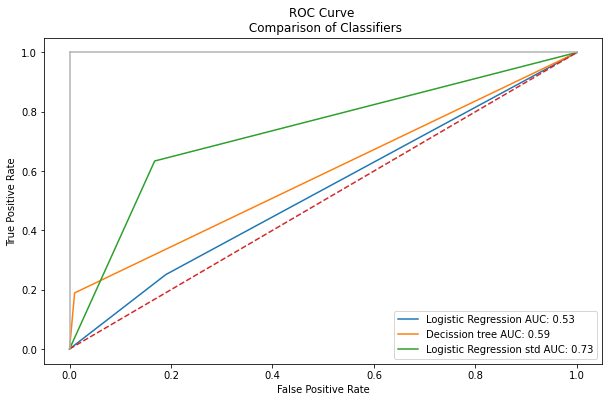

In [81]:
fig  = plt.figure(figsize=(10,6))
plt.title('ROC Curve \n Comparison of Classifiers')
plt.plot(log_fpr, log_tpr, label ='Logistic Regression AUC: {:.2f}'.format(roc_auc_score(y_test,  logreg.predict(X_test))))
plt.plot(tree_fpr, tree_tpr, label ='Decission tree AUC: {:.2f}'.format(roc_auc_score(y_test, clf.predict(X_test))))
plt.plot(log2_fpr, log2_tpr, label ='Logistic Regression std AUC: {:.2f}'.format(roc_auc_score(y_test,  logreg2.predict(X_test_s))))

plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [82]:
kf = KFold(n_splits=5,  shuffle=False)

In [83]:
print('CV logreg test:',cross_val_score(logreg, X_test, y_test, cv=kf, scoring='accuracy'))
print('CV tree test:',cross_val_score(clf, X_test, y_test, cv=kf, scoring='accuracy'))
print('CV logreg std test:',cross_val_score(logreg2, X_test_s, y_test, cv=kf, scoring='accuracy'))

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

CV logreg test: [0.93383333 0.931      0.93683333 0.93083333 0.9365    ]
CV tree test: [0.93316667 0.9305     0.9385     0.93466667 0.9345    ]
CV logreg std test: [0.74366667 0.76066667 0.7755     0.767      0.7375    ]


In [100]:
with open(r'tree_model.pickle', 'wb') as f:
    pickle.dump(clf, f)